## Feature Extraction

## Feature Detection and Description

## Edge detection

<font size="3">Edge detection is a pre-processing technique where the input is a 2D (gray-scale) image and the output is a set of curves (that are called the edges). The salient features of an image are extracted in the edges detection process; an image representation using edges is more compact than one using pixels. The edge detectors output the magnitude of the gradients (as a gray-scale image), and now, to get the edge pixels (as a binary image), we need to threshold the gradient image.</font>

## Canny Edge Detection

<font size="3">Canny Edge Detection is a popular edge detection algorithm. It was developed by John F. Canny in 1986. It is a multi-stage algorithm and we will go through each stages.<font size="3">

### Noise Reduction
<font size="3">Since edge detection is susceptible to noise in the image, first step is to remove the noise in the image with a 5x5 Gaussian filter is used to remove noise from the image.

### Finding Intensity Gradient of the Image /Computing magnitude and orientation of the gradient
<font size="3">Smoothened image is then filtered with a Sobel kernel in both horizontal and vertical direction to get first derivative in horizontal direction (G_x) and vertical direction (G_y). From these two images, we can find edge gradient and direction for each pixel as follows:

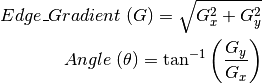

In [1]:
from IPython.display import Image
Image(filename='./images/input/canny.png',width=300)

<font size="3">Gradient direction is always perpendicular to edges. It is rounded to one of four angles representing vertical, horizontal and two diagonal directions.

### Non-maximum Suppression

<font size="3">After getting gradient magnitude and direction, a full scan of image is done to remove any unwanted pixels which may not constitute the edge. For this, at every pixel, pixel is checked if it is a local maximum in its neighborhood in the direction of gradient. Check the image below:

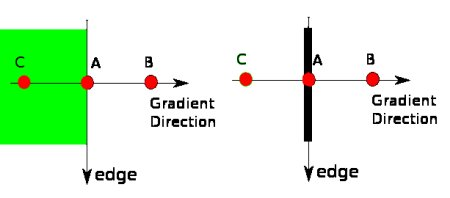

In [2]:
Image(filename='./images/input/canny2.jpg',width=300)

<font size="3">Point A is on the edge ( in vertical direction). Gradient direction is normal to the edge. Point B and C are in gradient directions. So point A is checked with point B and C to see if it forms a local maximum. If so, it is considered for next stage, otherwise, it is suppressed ( put to zero).

In short, the result you get is a binary image with “thin edges”.

### Hysteresis Thresholding

<font size="3">This stage decides which are all edges are really edges and which are not. For this, we need two threshold values, minVal and maxVal. Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to “sure-edge” pixels, they are considered to be part of edges. Otherwise, they are also discarded. See the image below:

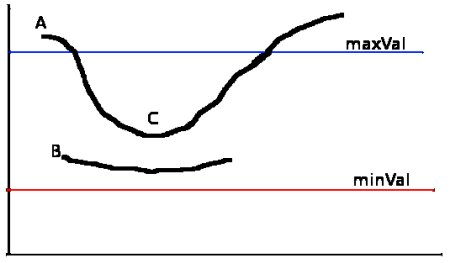

In [3]:
Image(filename='./images/input/canny3.jpg',width=300)


<font size="3">The edge A is above the maxVal, so considered as “sure-edge”. Although edge C is below maxVal, it is connected to edge A, so that also considered as valid edge and we get that full curve. But edge B, although it is above minVal and is in same region as that of edge C, it is not connected to any “sure-edge”, so that is discarded. So it is very important that we have to select minVal and maxVal accordingly to get the correct result.

This stage also removes small pixels noises on the assumption that edges are long lines.

So what we finally get is strong edges in the image.</font>

<font color = "deeppink">Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) -> edges</font>

### Canny edge detection using OpenCv

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

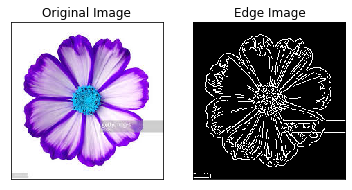

In [5]:
image = cv2.imread('./images/input/img3.jpg')
edges = cv2.Canny(image,100,200)
plt.subplot(121),plt.imshow(image,cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

# Image Gradients

- Find Image gradients, edges etc
- We will see following functions : cv2.Sobel(), cv2.Scharr(), cv2.Laplacian() etc


<font size="3" color="green">OpenCV provides three types of gradient filters or High-pass filters, Sobel, Scharr and Laplacian. We will see each one of them.</font>


<font color="blue">https://theailearner.com/2019/05/24/first-order-derivative-kernels-for-edge-detection/</font>

##  Sobel and Scharr Derivatives

<font size="3">Sobel operators is a joint Gausssian smoothing plus differentiation operation, so it is more resistant to noise. You can specify the direction of derivatives to be taken, vertical or horizontal (by the arguments, yorder and xorder respectively). You can also specify the size of kernel by the argument ksize. If ksize = -1, a 3x3 Scharr filter is used which gives better results than 3x3 Sobel filter. Please see the docs for kernels used.

## Sobel Edge Detector

<font size="3">The Sobel operator performs a 2-D spatial gradient measurement on an image and so emphasizes regions of high spatial frequency that correspond to edges. Typically it is used to find the approximate absolute gradient magnitude at each point in an input grayscale image.</font>

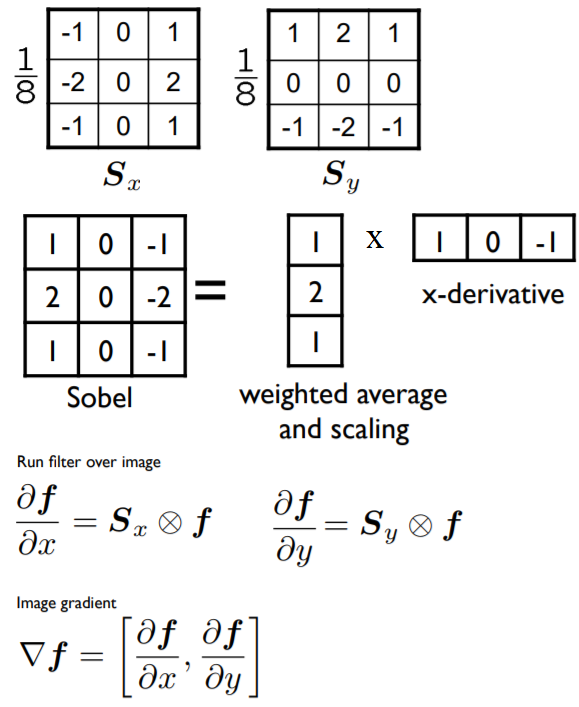

In [6]:
Image(filename='./images/input/sobel.png',width=300)

<font size="3">The 1/8 term is not included in the standard definition of the Sobel operator as for edge detection purposes, it does not make a difference, although the normalization term is needed to get the gradient value correctly. </font>

<font color ="deeppink" size="3">Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]]) -> dst</font>

## Laplacian Derivatives

It calculates the Laplacian of the image given by the relation, \Delta src = \frac{\partial ^2{src}}{\partial x^2} + \frac{\partial ^2{src}}{\partial y^2} where each derivative is found using Sobel derivatives. If ksize = 1, then following kernel is used for filtering:

kernel = \begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0  \end{bmatrix}

In [7]:
Image(filename='./images/input/lapplace.png',width=300)

### Sobel Edge detection using OpnenCV

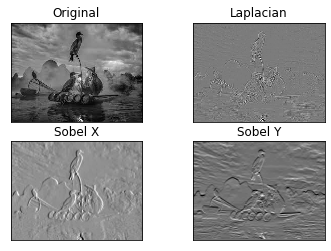

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/input/img1.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

<font size="3" color="green">
Note
:In our last example, output datatype is cv2.CV_8U or np.uint8. But there is a slight problem with that. Black-to-White transition is taken as Positive slope (it has a positive value) while White-to-Black transition is taken as a Negative slope (It has negative value). So when you convert data to np.uint8, all negative slopes are made zero. In simple words, you miss that edge.

If you want to detect both edges, better option is to keep the output datatype to some higher forms, like cv2.CV_16S, cv2.CV_64F etc, take its absolute value and then convert back to cv2.CV_8U. Below code demonstrates this procedure for a horizontal Sobel filter and difference in results.



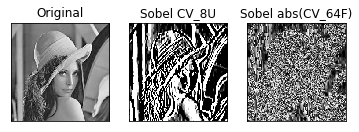

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/input/lena.jpg',0)

# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.show()

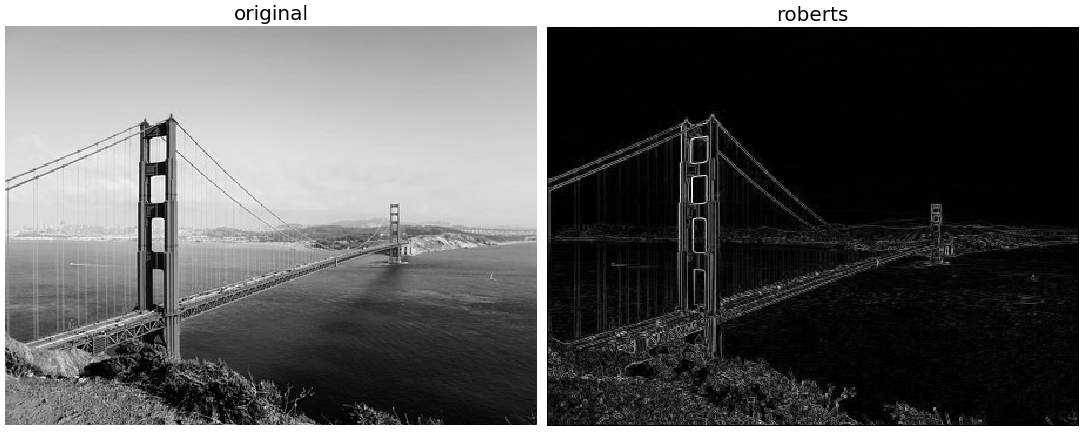

In [10]:
Image(filename='./images/input/diffedge.png',width=400)

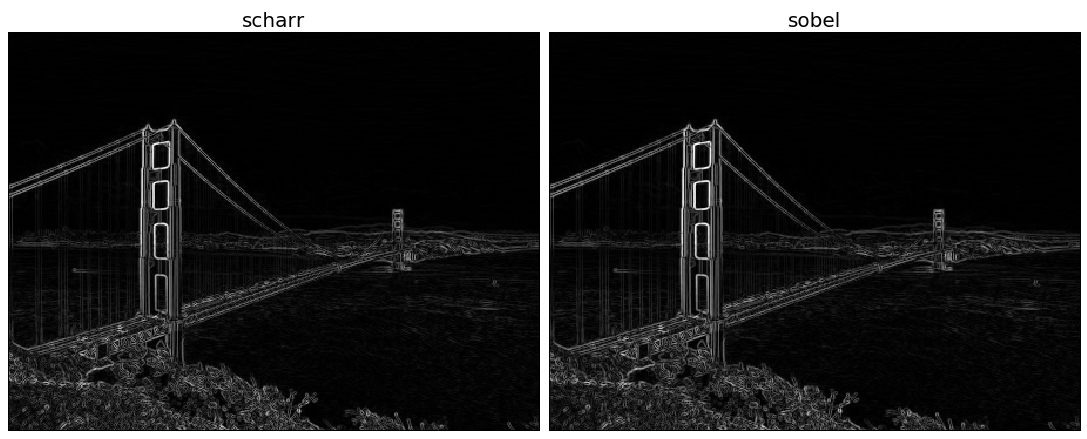

In [11]:
Image(filename='./images/input/diff1.png',width=400)

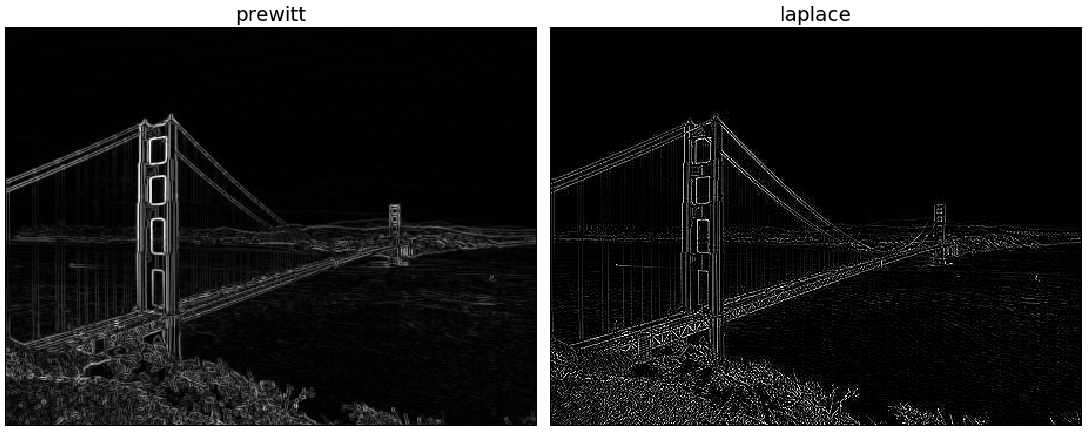

In [12]:
Image(filename='./images/input/diff2.png',width=400)

# The LoG and DoG filters

<font size="3">
Laplacian of a Gaussian (LoG) is just another linear filter which is a combination of Gaussian followed by the Laplacian filter on an image. Since the 2nd derivative is very sensitive to noise, it is always a good idea to remove noise by smoothing the image before applying the Laplacian to ensure that noise is not aggravated. </font>

<font size="3">Because of the associative property of convolution, it can be thought of as taking the 2nd derivative (Laplacian) of the Gaussian filter and then applying the resulting (combined) filter onto the image, hence the name LoG. It can be efficiently approximated using the difference of two Gaussians (DoG) with different scales (variances), as shown in the following diagram:

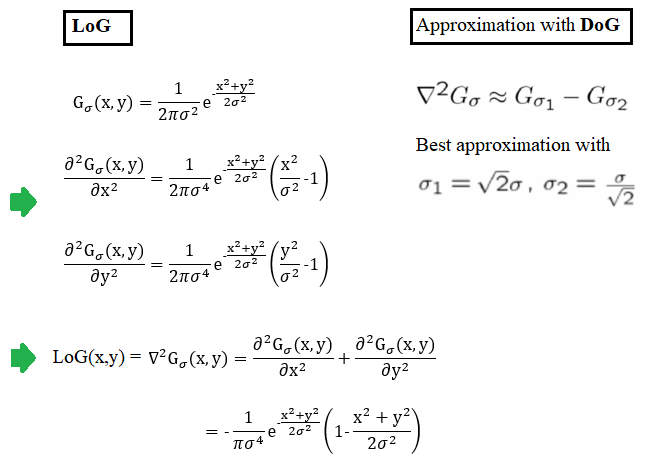

In [13]:
Image(filename='./images/input/loganddog.png',width=500)

In [14]:
import cv2
import numpy as np
 
# Load the image in greyscale
img = cv2.imread('./images/input/img3.jpg',0)
 
# Apply Gaussian Blur
blur = cv2.GaussianBlur(img,(3,3),0)
 
# Apply Laplacian operator in some higher datatype
laplacian = cv2.Laplacian(blur,cv2.CV_64F)

# But this tends to localize the edge towards the brighter side.
laplacian1 = laplacian/laplacian.max()
 
# cv2.imshow('a7',laplacian1)

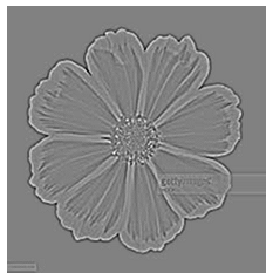

In [26]:
plt.axis('off')
plt.imshow(laplacian1, cmap='gray')
plt.tight_layout()
plt.show()

## Difference of two Gaussians (DoG)

<font size="3" color="red">Difference of Gaussian acts like a bandpass filter.
    <br>
    https://theailearner.com/2019/05/13/difference-of-gaussians-dog/

In [23]:
import cv2
img = cv2.imread('./images/input/img3.jpg')

# Apply 3x3 and 7x7 Gaussian blur
low_sigma = cv2.GaussianBlur(img,(3,3),0)
high_sigma = cv2.GaussianBlur(img,(5,5),0)

# Calculate the DoG by subtracting
dog = low_sigma - high_sigma
# cv2.imshow('input',dog)
# cv2.waitKey(0)

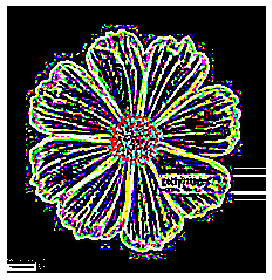

In [29]:
plt.axis('off')
plt.imshow(dog, cmap='gray')
plt.tight_layout()
plt.show()

## Edge detection with the LoG filter

<font size="3">
    
- First, the input image needs to be smoothed (by convolution with the Gaussian filter).
- Then, the smoothed image needs to be convolved with the Laplacian filter to obtain the output image as ∇2 (I (x,y) * G (x,y)).
- Finally the zero-crossings from the image obtained in the last step need to be computed, as shown in the following diagram:</font>

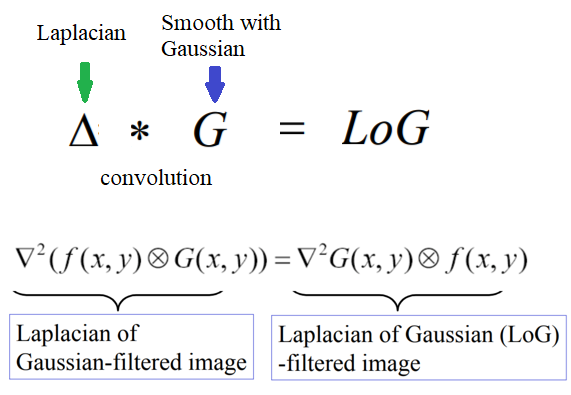

In [28]:
Image(filename='./images/input/logedge.png',width=500)